In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv("housing.csv")

In [3]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#check for nulls in the dataset
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.corr

<bound method DataFrame.corr of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

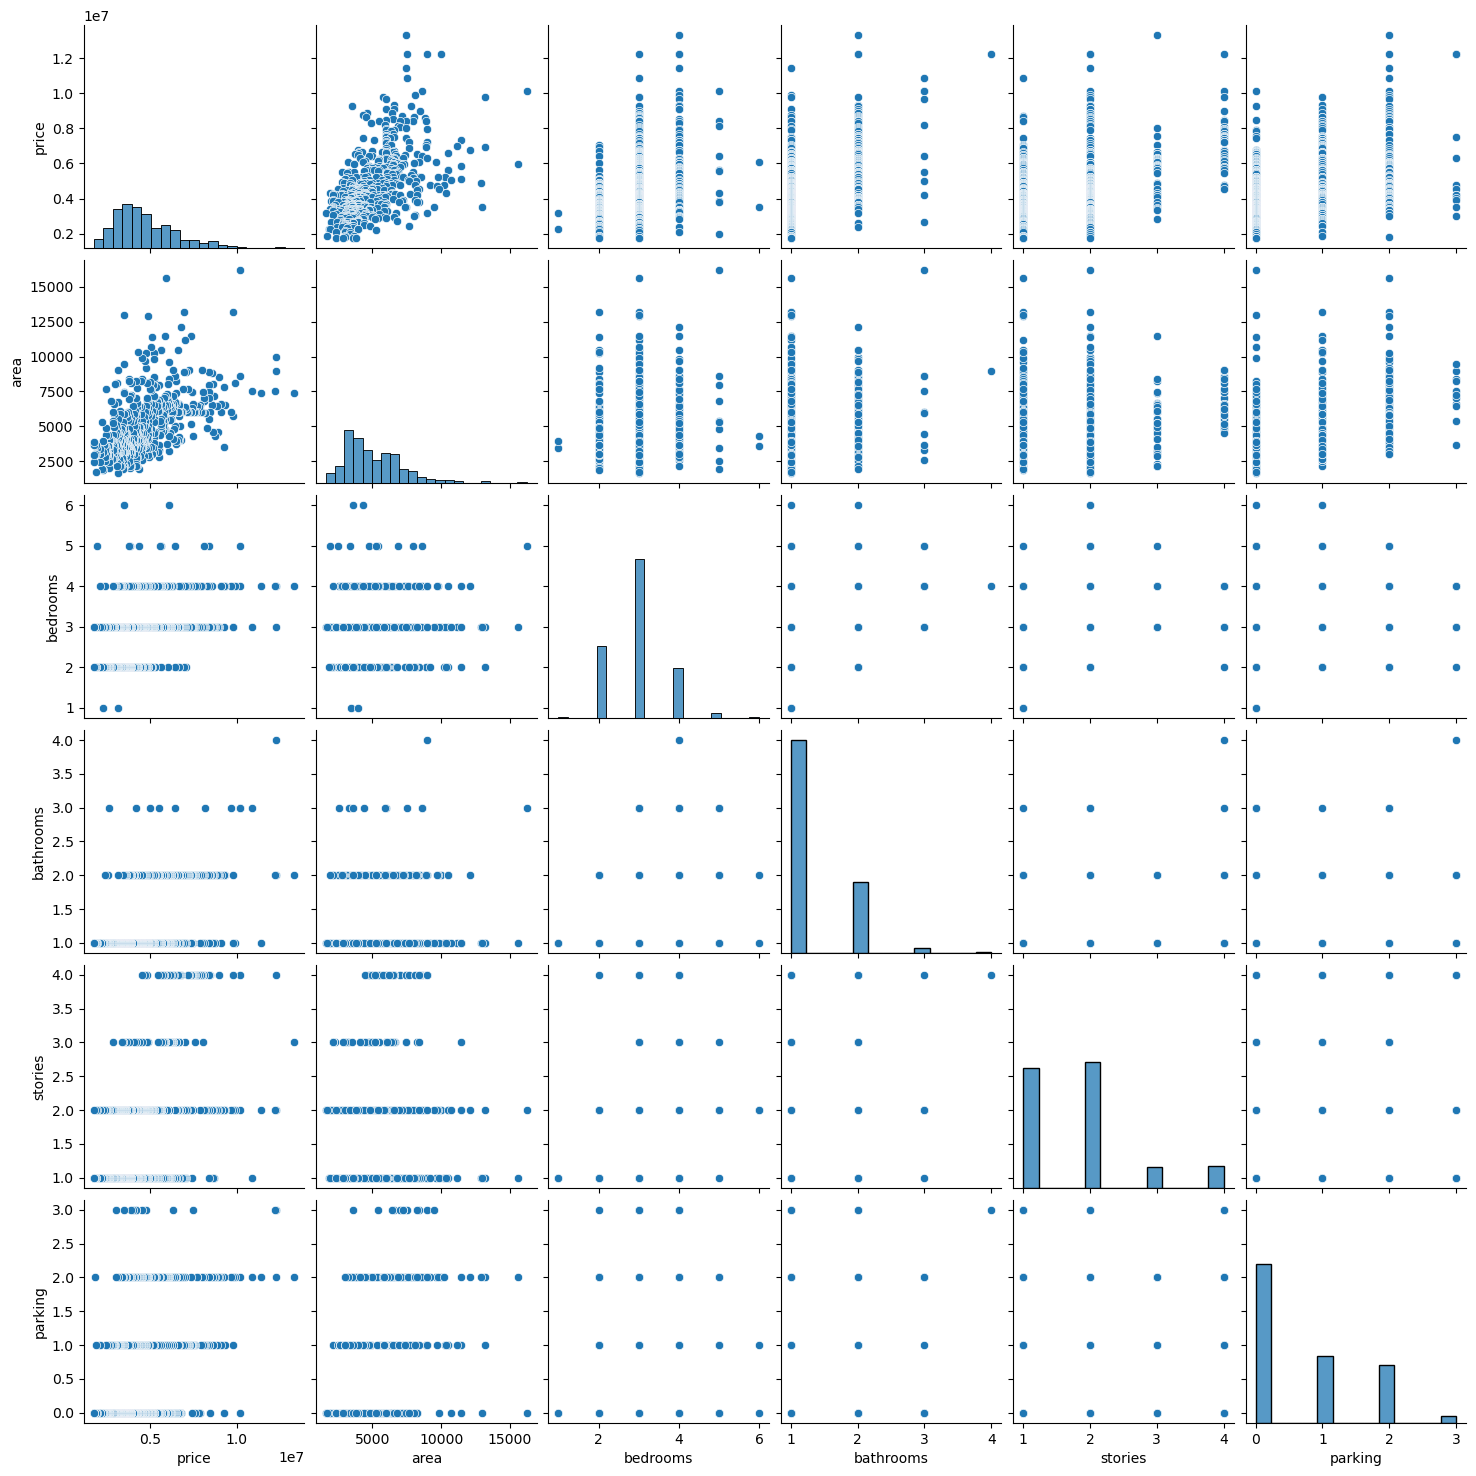

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='area', ylabel='price'>

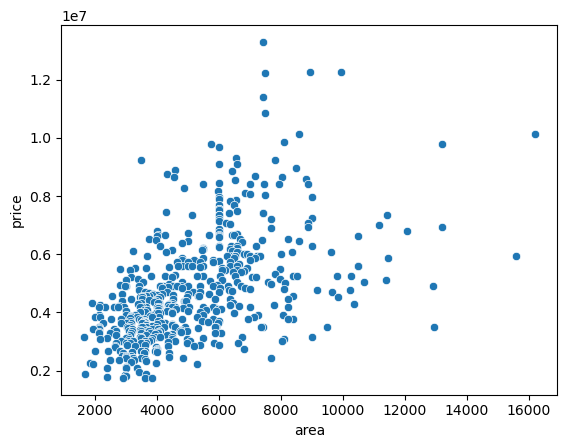

In [8]:
sns.scatterplot(x=df["area"],y=df["price"])

<AxesSubplot:xlabel='stories', ylabel='price'>

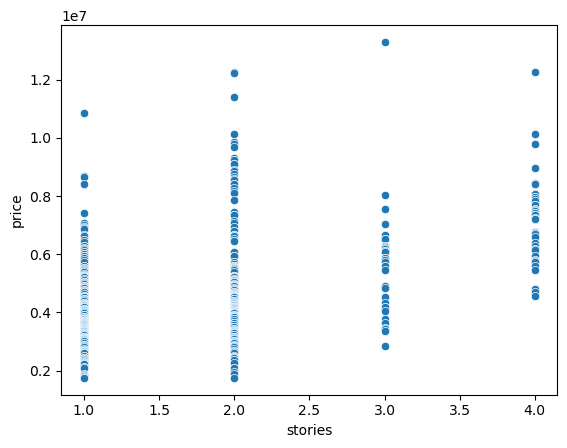

In [9]:
sns.scatterplot(x=df["stories"],y=df["price"])

In [10]:
#import label encoder
from sklearn import preprocessing 

In [11]:
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df["guestroom"] = label_encoder.fit_transform(df["guestroom"])
df.head()

price  area  bedrooms  bathrooms  stories mainroad  guestroom basement  \
0  13300000  7420         4          2        3      yes          0       no   
1  12250000  8960         4          4        4      yes          0       no   
2  12250000  9960         3          2        2      yes          0      yes   
3  12215000  7500         4          2        2      yes          0      yes   
4  11410000  7420         4          1        2      yes          1      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [12]:
label_encoder = preprocessing.LabelEncoder()
df["mainroad"] = label_encoder.fit_transform(df["mainroad"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom basement  \
0  13300000  7420         4          2        3         1          0       no   
1  12250000  8960         4          4        4         1          0       no   
2  12250000  9960         3          2        2         1          0      yes   
3  12215000  7500         4          2        2         1          0      yes   
4  11410000  7420         4          1        2         1          1      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [13]:
df["basement"] = label_encoder.fit_transform(df["basement"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0         0              no             yes        2      yes        furnished  
1         0              no             yes        3       no        furnished  
2         1              no              no        2      yes   semi-furnished  
3         1              no             yes        3      yes        furnished  
4         1              no             yes        2       no        furnished

In [14]:
df["hotwaterheating"] = label_encoder.fit_transform(df["hotwaterheating"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating airconditioning  parking prefarea  \
0         0                0             yes        2      yes   
1         0                0             yes        3       no   
2         1                0              no        2      yes   
3         1                0             yes        3      yes   
4         1                0             yes        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [15]:
df["airconditioning"] = label_encoder.fit_transform(df["airconditioning"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking prefarea  \
0         0                0                1        2      yes   
1         0                0                1        3       no   
2         1                0                0        2      yes   
3         1                0                1        3      yes   
4         1                0                1        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [16]:
df["prefarea"] = label_encoder.fit_transform(df["prefarea"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [17]:
df["furnishingstatus"] = label_encoder.fit_transform(df["furnishingstatus"])
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [18]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          1.069725  
std      0.861586    0.424302          0.761373  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          1.000000  
75%      1.000000    0.000000          2.000000  
max      3.000000    1.000000          2.000000

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

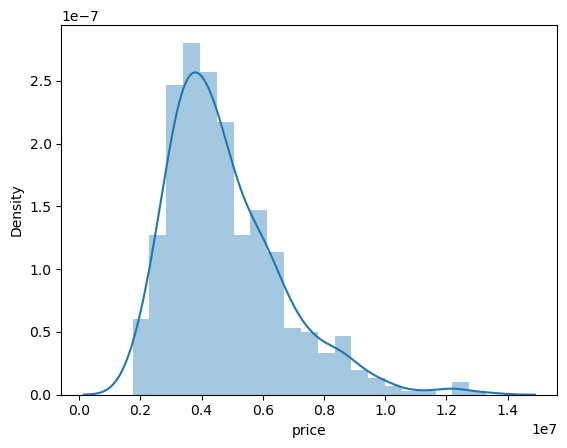

In [19]:
sns.distplot(df["price"])

In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='price')
y=df["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# instantiate, fit
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
print(lm.intercept_) 
print(lm.coef_)

104406.20866452903
[ 2.53732234e+02  1.26430216e+05  1.00306572e+06  4.31159234e+05
  4.34983941e+05  3.95198712e+05  3.30288607e+05  1.20896581e+06
  8.59967238e+05  2.20086777e+05  6.93749764e+05 -2.55656836e+05]


In [23]:
prediction=lm.predict(X_test)

In [24]:
prediction

array([ 4019080.69890147,  6258021.768564  ,  4392719.13411048,
        7335082.21688194,  2892857.56615675,  7084655.57701774,
        3258634.73504731,  3196499.16068631,  3520106.01134941,
        8359610.28845465,  6646926.36096856,  3788844.63269237,
        3734072.96467981,  4616010.40973202,  3946124.94405792,
        2023177.4684687 ,  3975554.48783028,  3624716.9650089 ,
        3210282.74216168,  4668411.38105794,  5893719.66376515,
        6415683.83807236,  4657036.55831934,  2704096.11205267,
        5356909.86181449,  5740682.56798041,  5337586.47961082,
        5444859.96648235,  5702144.57144375,  5865872.30432731,
        3307327.30668416,  6299491.02684292,  7123479.95544321,
        2960326.86653052,  4424323.19483818,  5125081.85591294,
        4947693.93115736,  3629027.81981122,  2975421.52734785,
        3975089.54021919,  8106313.95534003,  5014658.87529549,
        6469749.69804857,  3566139.31348661,  3868652.86219465,
        6344993.74699856,  4482572.73153

In [25]:
plt.scatter(y_test,prediction)

In [26]:
new_df=pd.DataFrame(y_test)
new_df["Predicted"]=prediction
new_df

price     Predicted
239  4585000  4.019081e+06
113  6083000  6.258022e+06
325  4007500  4.392719e+06
66   6930000  7.335082e+06
479  2940000  2.892858e+06
..       ...           ...
76   6650000  7.400968e+06
132  5810000  5.138942e+06
311  4123000  4.058811e+06
464  3080000  4.972826e+06
155  5530000  6.367950e+06

[109 rows x 2 columns]

In [27]:
#evaluation of model
from sklearn.metrics import *
#evaluation metrics
#from r squared matrics values,we can say that linear regression is the best model 
R2 = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,prediction)
#print the evaluation metrics
print("the value of R^2 : ", R2 * 100.00, "%")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

the value of R^2 :  65.78047592637594 %
Mean Squared Error (MSE): 986041803890.027
Root Mean Squared Error (RMSE): 992996.3765744702
Mean Absolute Error (MAE): 716583.439661547


In [28]:
X_test

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
239   4000         3          1        2         1          0         0   
113   9620         3          1        1         1          0         1   
325   3460         4          1        2         1          0         0   
66   13200         2          1        1         1          0         1   
479   3660         4          1        2         0          0         0   
..     ...       ...        ...      ...       ...        ...       ...   
76    6420         3          2        3         1          0         0   
132   5200         3          1        3         1          0         0   
311   6060         2          1        1         1          0         1   
464   4500         2          1        2         1          0         0   
155   6100         3          2        1         1          0         1   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
239                0                0        1         0                 0  
113                0                0        2         1                 0  
325                0                1        0         0                 1  
66                 1                0        1         0                 0  
479                0                0        0         0                 2  
..               ...              ...      ...       ...               ...  
76                 0                1        0         1                 0  
132                0                1        0         0                 1  
311                0                0        1         0                 1  
464                1                0        1         0                 1  
155                0                0        2         1                 0  

[109 rows x 12 columns]

In [29]:
lm.predict([[4000,3,1,2,1,0,0,0,0,1,0,0]])

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4019080.69890147])